# Handwritten digits recognition (using Multilayer Perceptron)

# import all the dependecies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime
import tensorflow as tf
import pandas as pd
import platform
import graphviz

## load the data

In [5]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [6]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## exploring data

In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


### this is a 28x28 matrix and each integers represent a color of a pixel

#### let's print some training example to see how it looks like

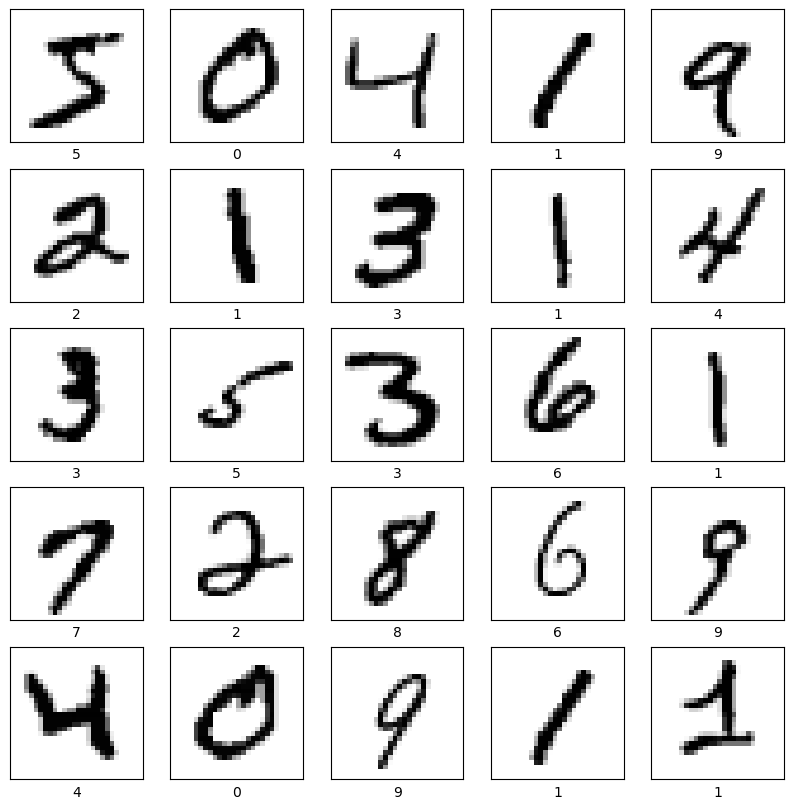

In [11]:
# Number of images to display
numbers_to_display = 25

# Calculate the number of rows and columns needed in the grid
num_cells = math.ceil(math.sqrt(numbers_to_display))

# Set the figure size for better visibility
plt.figure(figsize=(10, 10))

# Loop through the first 25 images
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)  # Create a subplot for each image
    plt.xticks([])  # Remove x-axis tick marks
    plt.yticks([])  # Remove y-axis tick marks
    plt.grid(False)  # Hide the grid lines
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # Display the image in black and white
    plt.xlabel(y_train[i])  # Display the label below each image

plt.show()


In [12]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [13]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Let's see how the digits look like after normalization. We're expecting it to look similar to original.

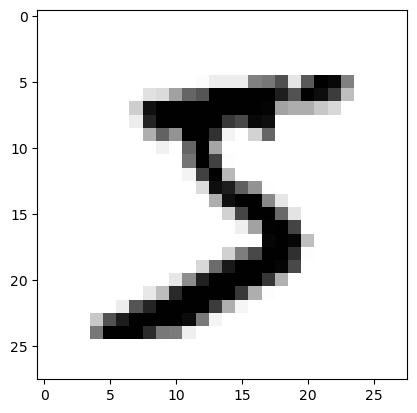

In [15]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

# build the model

In [17]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## compile the model

In [20]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## train the model

In [22]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8730 - loss: 0.7750 - val_accuracy: 0.9544 - val_loss: 0.3284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9537 - loss: 0.3130 - val_accuracy: 0.9528 - val_loss: 0.2944
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9609 - loss: 0.2627 - val_accuracy: 0.9627 - val_loss: 0.2501
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9659 - loss: 0.2359 - val_accuracy: 0.9640 - val_loss: 0.2288
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9653 - loss: 0.2222 - val_accuracy: 0.9670 - val_loss: 0.2069
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9671 - loss: 0.2156 - val_accuracy: 0.9680 - val_loss: 0.2014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9684 - loss: 0.2035 - val_accuracy: 0.9625 - val_loss: 0.2104
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9693 - loss: 0.1965 -

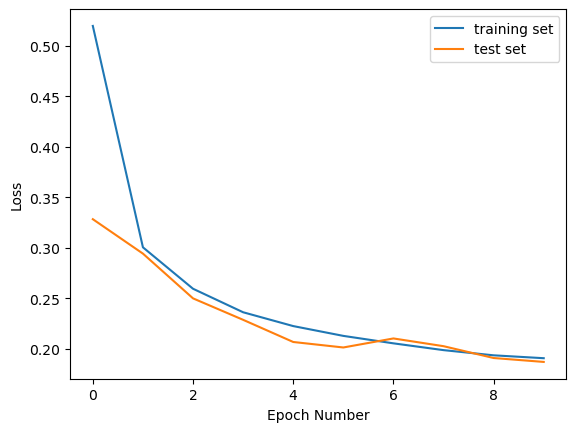

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

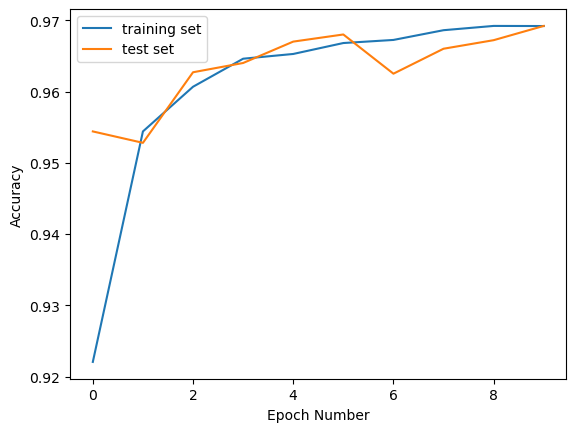

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## evaluate the model accuracy

### test accuracy

In [27]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [28]:
print('train_loss: ', train_loss)
print('train_accuracy: ', train_accuracy)

train_loss:  0.1719357818365097
train_accuracy:  0.9755333065986633


## let's save the model before making predictions 

In [30]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [31]:
loaded_model = tf.keras.models.load_model(model_name)

## let's use this model to do some predictions

In [33]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

  1/313 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [34]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [35]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.683532e-06,2.094944e-06,3.357629e-04,3.830820e-04,3.495813e-08,1.528478e-05,1.459499e-09,9.990356e-01,0.000007,2.195811e-04
1,4.856458e-05,1.845561e-04,9.942954e-01,5.361914e-03,1.030269e-08,1.005657e-07,1.957864e-06,2.739393e-06,0.000105,7.117109e-10
2,3.235889e-05,9.887620e-01,3.473122e-03,3.127397e-04,5.285263e-05,2.487056e-04,8.338848e-04,3.905771e-03,0.002359,2.007059e-05
3,9.950482e-01,7.457606e-07,6.937327e-04,4.146594e-05,4.442744e-05,2.202398e-04,1.984891e-03,2.892091e-04,0.000133,1.543558e-03
4,2.560828e-04,5.742367e-06,3.558269e-05,4.291132e-06,9.874237e-01,2.786831e-04,3.996751e-04,1.768198e-03,0.000003,9.825476e-03
...,...,...,...,...,...,...,...,...,...,...
9995,1.034653e-06,2.624529e-05,9.995253e-01,3.439924e-04,7.151371e-12,8.645203e-09,1.122253e-09,9.348890e-05,0.000010,5.492823e-10
9996,3.201507e-07,6.909911e-06,3.672138e-05,9.972926e-01,3.023525e-08,5.580210e-04,6.358597e-10,1.228394e-05,0.000054,2.039291e-03
9997,2.792975e-08,1.197615e-05,6.404094e-08,4.357556e-06,9.983994e-01,3.725565e-07,1.589994e-08,5.385046e-05,0.000007,1.523075e-03
9998,3.612036e-05,1.110354e-06,1.523271e-06,1.283199e-04,1.075602e-08,9.989583e-01,3.407547e-04,1.630719e-06,0.000531,1.687124e-06


In [36]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


### the model is predicting that the first example from the test set is 7

In [50]:
print(predictions[0])

7


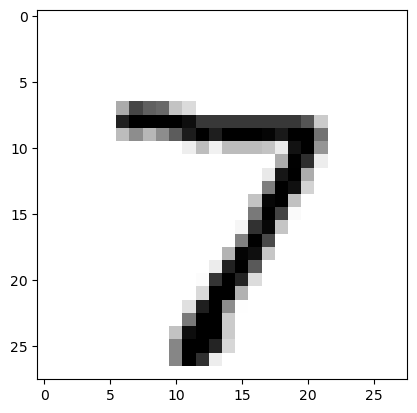

In [66]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

##### the model successfully recognized the first example

##### let's print some more examples

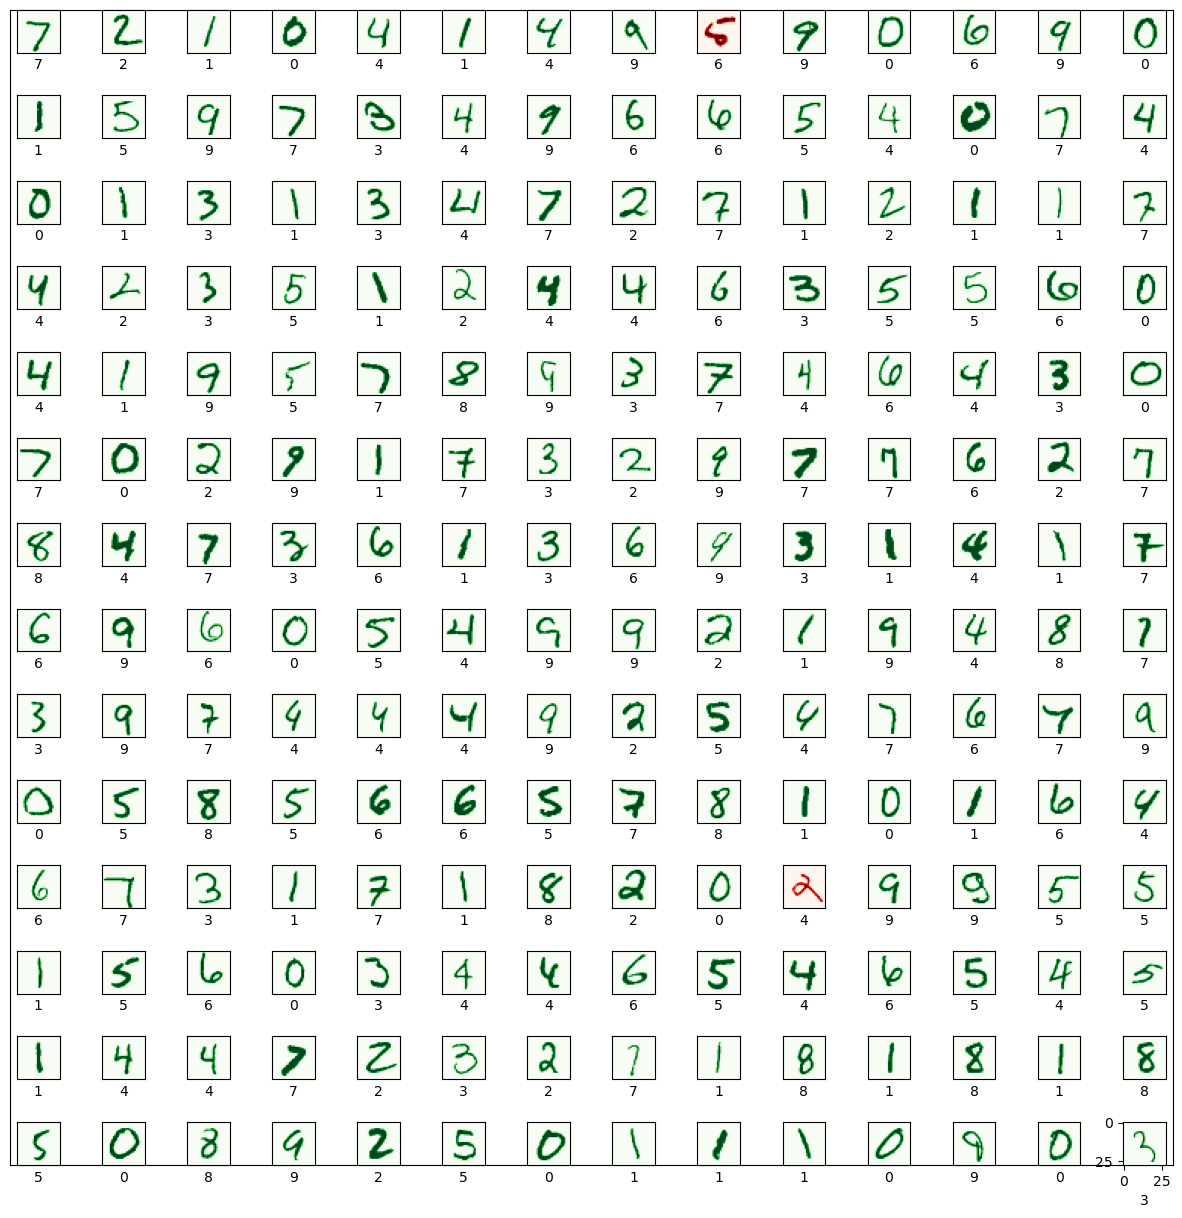

In [69]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


### plotting a confusion matrix

##### this will shows what numbers are well recognised by the model and where the model get confused 

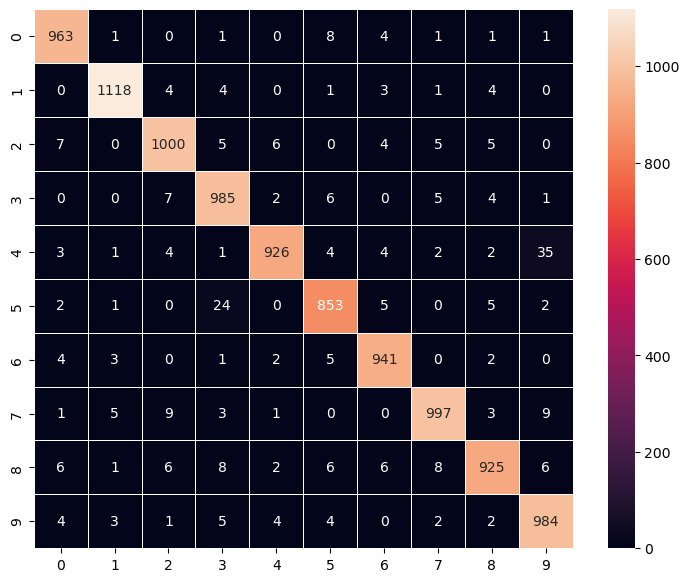

In [74]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


## debbuging the model with tensorboard

In [85]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
